<a href="https://colab.research.google.com/github/menna03/Full-Projects-hotel_booking/blob/main/Visiualization_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.data as pld
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hotel_booking.csv')
df.shape
display(df.keys())

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

#Cleaning and preprocessing

##Checking data type correctness

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119228 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119228 non-null  object 
 1   is_canceled                     119228 non-null  int64  
 2   lead_time                       119228 non-null  int64  
 3   arrival_date_year               119228 non-null  int64  
 4   arrival_date_month              119228 non-null  object 
 5   arrival_date_week_number        119228 non-null  int64  
 6   arrival_date_day_of_month       119228 non-null  int64  
 7   stays_in_weekend_nights         119228 non-null  int64  
 8   stays_in_week_nights            119228 non-null  int64  
 9   adults                          119228 non-null  int64  
 10  children                        119226 non-null  float64
 11  babies                          119228 non-null  int64  
 12  meal            

##Checking duplicates

In [ ]:
df.duplicated().sum()

0

##Checking Missing Data

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               2
babies                                 0
meal                                   0
country                              328
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16178
company         

###Dropping data

####Checking null values row wise

In [ ]:
df.shape

(119228, 36)

In [ ]:
rows = df.isna().sum(axis=1)
print('we have ', rows[rows >= 3].shape[0], ' rows that contian more than 3 null values')
rows[rows >= 3]

we have  0  rows that contian more than 3 null values


Series([], dtype: int64)

In [ ]:
idexes_to_drop = rows[rows >= 3].index
df = df.drop(index=idexes_to_drop)

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               2
babies                                 0
meal                                   0
country                              328
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16178
company         

####Checking null column wise

In [ ]:
np.round((df.isna().sum()/df.shape[0])*100)

hotel                              0.0
is_canceled                        0.0
lead_time                          0.0
arrival_date_year                  0.0
arrival_date_month                 0.0
arrival_date_week_number           0.0
arrival_date_day_of_month          0.0
stays_in_weekend_nights            0.0
stays_in_week_nights               0.0
adults                             0.0
children                           0.0
babies                             0.0
meal                               0.0
country                            0.0
market_segment                     0.0
distribution_channel               0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
reserved_room_type                 0.0
assigned_room_type                 0.0
booking_changes                    0.0
deposit_type                       0.0
agent                             14.0
company                           94.0
days_in_waiting_list     

As company is 94% and that exceeds 30% mark, i will drop company from the dataset.

new data after droping company col.

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               2
babies                                 0
meal                                   0
country                              328
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16178
company         

### Imputing data


##### 1.1 replacing with median

In [ ]:
df[df['children'].isna()].head()

hotel  is_canceled  lead_time  arrival_date_year  \
40667  City Hotel            1          1               2015   
41160  City Hotel            1          8               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40667             August                        32                          5   
41160             August                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40667                        0                     2       2  ...   
41160                        2                     5       2  ...   

         customer_type   adr required_car_parking_spaces  \
40667  Transient-Party  12.0                           0   
41160  Transient-Party  76.5                           0   

      total_of_special_requests reservation_status reservation_status_date  \
40667                         1           Canceled              2015-08-04   
41160                         1           Canceled              2015-08-09   

                name                     email  phone-number       credit_card  
40667   David Murphy  David.Murphy94@yahoo.com  231-438-6733  ************8925  
41160  Jerry Roberts      JRoberts@hotmail.com  979-355-3554  ************5648  

[2 rows x 36 columns]

In [ ]:
df['children'].median()

0.0

In [ ]:
df = df.fillna({
    'children': df['children'].median(),
})

In [ ]:
df[df['children'].isna()].head()

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, name, email, phone-number, credit_card]
Index: []

[0 rows x 36 columns]

Result After replacing

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              328
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16178
company         

##### 1.2 replacing with mode

In [ ]:
df['country'].mode()[0]

'PRT'

In [ ]:
df = df.fillna({
    'country': df['country'].mode()[0],
})

In [ ]:
df[df['country'].isna()].head()

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, name, email, phone-number, credit_card]
Index: []

[0 rows x 36 columns]

Result After replacing

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16178
company         

##### 1.3 replacing with mode(another col.)

In [ ]:
df['agent'].mode()[0]

9.0

In [ ]:
df = df.fillna({
    'agent': df['agent'].mode()[0],
})

In [ ]:
df[df['agent'].isna()].head()

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, name, email, phone-number, credit_card]
Index: []

[0 rows x 36 columns]

Result After replacing

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

## Changing 0 and 1 to make it meaningful in some cols.

Cols. are (is_canceled, is_repeated_guest).

In [ ]:
df['is_canceled'] = df['is_canceled'].replace([0,1],['No','Yes'])
df.head()

hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          No        342               2015               July   
1  Resort Hotel          No        737               2015               July   
2  Resort Hotel          No          7               2015               July   
3  Resort Hotel          No         13               2015               July   
4  Resort Hotel          No         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1                        0                     0       2  ...      Transient   
2                        0                     1       1  ...      Transient   
3                        0                     1       1  ...      Transient   
4                        0                     2       2  ...      Transient   

    adr required_car_parking_spaces total_of_special_requests  \
0   0.0                           0                         0   
1   0.0                           0                         0   
2  75.0                           0                         0   
3  75.0                           0                         0   
4  98.0                           0                         1   

  reservation_status reservation_status_date            name  \
0          Check-Out              2015-07-01   Ernest Barnes   
1          Check-Out              2015-07-01    Andrea Baker   
2          Check-Out              2015-07-02  Rebecca Parker   
3          Check-Out              2015-07-02    Laura Murray   
4          Check-Out              2015-07-03     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498  

[5 rows x 36 columns]

In [ ]:
df['is_repeated_guest'] = df['is_repeated_guest'].replace([0,1],['No','Yes'])
df.head()

hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          No        342               2015               July   
1  Resort Hotel          No        737               2015               July   
2  Resort Hotel          No          7               2015               July   
3  Resort Hotel          No         13               2015               July   
4  Resort Hotel          No         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1                        0                     0       2  ...      Transient   
2                        0                     1       1  ...      Transient   
3                        0                     1       1  ...      Transient   
4                        0                     2       2  ...      Transient   

    adr required_car_parking_spaces total_of_special_requests  \
0   0.0                           0                         0   
1   0.0                           0                         0   
2  75.0                           0                         0   
3  75.0                           0                         0   
4  98.0                           0                         1   

  reservation_status reservation_status_date            name  \
0          Check-Out              2015-07-01   Ernest Barnes   
1          Check-Out              2015-07-01    Andrea Baker   
2          Check-Out              2015-07-02  Rebecca Parker   
3          Check-Out              2015-07-02    Laura Murray   
4          Check-Out              2015-07-03     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498  

[5 rows x 36 columns]

## ***Finding outliers***

In [ ]:
display(df.describe())

lead_time  arrival_date_year  arrival_date_week_number  \
count  119228.000000      119228.000000             119228.000000   
mean      104.117800        2016.156935                 27.166890   
std       106.881713           0.707516                 13.599975   
min         0.000000        2015.000000                  1.000000   
25%        18.000000        2016.000000                 16.000000   
50%        69.000000        2016.000000                 28.000000   
75%       161.000000        2017.000000                 38.000000   
max       737.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119228.000000            119228.000000   
mean                   15.798437                 0.927651   
std                     8.779900                 0.995995   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                16.000000   

       stays_in_week_nights         adults       children         babies  \
count         119228.000000  119228.000000  119228.000000  119228.000000   
mean               2.500193       1.856795       0.103986       0.007926   
std                1.899641       0.579211       0.398766       0.097246   
min                0.000000       0.000000       0.000000       0.000000   
25%                1.000000       2.000000       0.000000       0.000000   
50%                2.000000       2.000000       0.000000       0.000000   
75%                3.000000       2.000000       0.000000       0.000000   
max               41.000000      55.000000      10.000000      10.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119228.000000                   119228.000000   
mean                 0.087136                        0.135631   
std                  0.844845                        1.494732   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119228.000000  119228.000000  6797.000000         119228.000000   
mean          0.221030      76.151198   189.266735              2.324303   
std           0.652349     106.366656   131.655015             17.606462   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000       9.000000   179.000000              0.000000   
75%           0.000000     152.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119228.000000                119228.000000              119228.000000  
mean      101.864717                     0.062217                   0.571191  
std        50.519582                     0.244758                   0.792412  
min        -6.380000                     0.000000                   0.000000  
25%        69.360000                     0.000000                   0.000000  
50%        94.800000                     0.000000                   0.000000  
75%       126.000000                     0.000000                   1.000000  
max      5400.000000                     8.000000                   5.000000

We have found that there is no outliers in our data

In [ ]:
df.to_csv('hotel_booking.csv', index=False)

# Data Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119228 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119228 non-null  object 
 1   is_canceled                     119228 non-null  object 
 2   lead_time                       119228 non-null  int64  
 3   arrival_date_year               119228 non-null  int64  
 4   arrival_date_month              119228 non-null  object 
 5   arrival_date_week_number        119228 non-null  int64  
 6   arrival_date_day_of_month       119228 non-null  int64  
 7   stays_in_weekend_nights         119228 non-null  int64  
 8   stays_in_week_nights            119228 non-null  int64  
 9   adults                          119228 non-null  int64  
 10  children                        119228 non-null  float64
 11  babies                          119228 non-null  int64  
 12  meal            

### What are the nationalities that visit the hotel the most?
***Large sector of adult visitors come from Portugal***

In [ ]:
visitors_bar = px.bar(
    df.groupby('country', as_index=False).sum(),
    x='country',
    y='adults',
    title='Customer Count From Each Country',
    labels={"adults": "Adult Customers"}
)
visitors_bar.show()

### Do customers spend more time at week nights or weekend nights?

In [ ]:
px.bar(
    df.groupby('adults', as_index=False).mean(),
    x='adults',
    y='stays_in_weekend_nights',
    title='Customer Count For Weekends',
    labels = {"adults": "Customer"}
)

In [ ]:
px.bar(
    df.groupby('adults', as_index=False).mean(),
    x='adults',
    y='stays_in_week_nights',
    title='Customer Count For Week Days',
    labels={
        "adults": "Customer size",
        "stays_in_week_nights":"Number of nights booked"
    }
)

### What is the month with most arrivals?

In [ ]:
px.bar(
    df.groupby('arrival_date_month', as_index=False).mean(),
    x='arrival_date_month',
    y='adults',
    title='Average Number Of Customer Arriving In each month',
    labels={"adults": "Customer"}
)
# loged

### What is the composition of the customer types?

In [ ]:
px.pie(df, names='customer_type', title='Customer Type')

### What is the composition of the market segment

In [ ]:
px.pie(df, names='market_segment', title='Market Segment')

In [ ]:
px.pie(df, names='meal', title='Meals')

In [ ]:
px.pie(df, names='reservation_status', title='Reservation Status')

In [ ]:
px.pie(df, names='arrival_date_year', title='Arrival date year')

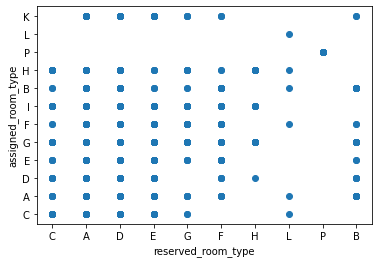

In [ ]:
plt.xlabel('reserved_room_type')
plt.ylabel('assigned_room_type')
plt.scatter(df["reserved_room_type"], df["assigned_room_type"])

In [ ]:
px.pie(df, names='deposit_type', title='Deposit type')